Iteration 1: Best Fitness = 1005.3550177641766
Iteration 2: Best Fitness = 1005.3550177641766
Iteration 3: Best Fitness = 1005.3550177641766
Iteration 4: Best Fitness = 992.8517275487794
Iteration 5: Best Fitness = 992.8517275487794
Iteration 6: Best Fitness = 992.8517275487794
Iteration 7: Best Fitness = 992.8517275487794
Iteration 8: Best Fitness = 992.8517275487794
Iteration 9: Best Fitness = 992.8517275487794
Iteration 10: Best Fitness = 992.8517275487794
Iteration 11: Best Fitness = 992.8517275487794
Iteration 12: Best Fitness = 992.8517275487794
Iteration 13: Best Fitness = 992.8517275487794
Iteration 14: Best Fitness = 992.8517275487794
Iteration 15: Best Fitness = 992.8517275487794
Iteration 16: Best Fitness = 992.8517275487794
Iteration 17: Best Fitness = 992.8517275487794
Iteration 18: Best Fitness = 992.8517275487794
Iteration 19: Best Fitness = 992.8517275487794
Iteration 20: Best Fitness = 992.8517275487794
Iteration 21: Best Fitness = 992.8517275487794
Iteration 22: Best 

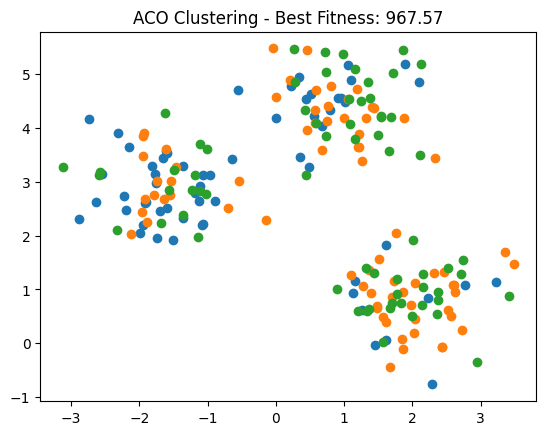

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Define the ACO parameters
class AntColonyClustering:
    def __init__(self, data, num_clusters, num_ants, alpha, beta, rho, num_iterations):
        self.data = data
        self.num_clusters = num_clusters  # Number of clusters
        self.num_ants = num_ants  # Number of ants (solutions)
        self.alpha = alpha  # Influence of pheromone
        self.beta = beta  # Influence of distance
        self.rho = rho  # Pheromone evaporation rate
        self.num_iterations = num_iterations
        self.num_data_points = len(data)

        # Initialize centroids (randomly)
        self.centroids = self.data[np.random.choice(self.num_data_points, self.num_clusters, replace=False)]

        # Pheromone initialization
        self.pheromones = np.ones((self.num_data_points, self.num_clusters))  # Initial pheromone values

    def _distance(self, point, centroid):
        """
        Calculate Euclidean distance between a data point and a centroid
        """
        return np.linalg.norm(point - centroid)

    def _probability(self, i, j):
        """
        Calculate the probability of assigning data point i to cluster j
        """
        pheromone = self.pheromones[i][j] ** self.alpha
        distance = 1.0 / (self._distance(self.data[i], self.centroids[j]) ** self.beta)
        return pheromone * distance

    def _assign_clusters(self, ant_solution):
        """
        Assign data points to clusters based on the ant's solution
        """
        clusters = {i: [] for i in range(self.num_clusters)}
        for i in range(self.num_data_points):
            clusters[ant_solution[i]].append(self.data[i])
        return clusters

    def _calculate_fitness(self, clusters):
        """
        Calculate the fitness of a clustering solution based on the within-cluster sum of squared distances
        """
        total_distance = 0
        for i in range(self.num_clusters):
            if len(clusters[i]) == 0:
                continue
            centroid = np.mean(clusters[i], axis=0)
            total_distance += np.sum([self._distance(point, centroid) ** 2 for point in clusters[i]])
        return total_distance

    def _update_pheromones(self, ants_solutions):
        """
        Update the pheromone levels based on the ants' solutions
        """
        # Evaporate pheromones
        self.pheromones *= (1 - self.rho)

        # Update pheromones based on ants' solutions
        for solution in ants_solutions:
            clusters = self._assign_clusters(solution)
            fitness = self._calculate_fitness(clusters)
            pheromone_deposit = 1.0 / (fitness + 1e-10)  # To avoid division by zero
            for i in range(self.num_data_points):
                self.pheromones[i][solution[i]] += pheromone_deposit

    def _select_next_cluster(self, i, visited):
      probabilities = []
      for j in range(self.num_clusters):
          if j not in visited:
              probabilities.append(self._probability(i, j))
          else:
              probabilities.append(0)

      total = sum(probabilities)

      if total == 0:  # Handle case where the total is zero
          # If total is zero, assign equal probabilities to all clusters
          probabilities = [1 / self.num_clusters] * self.num_clusters
      else:
          # Normalize the probabilities
          probabilities = [prob / total for prob in probabilities]

      return random.choices(range(self.num_clusters), probabilities)[0]


    def solve(self):
        best_solution = None
        best_fitness = float('inf')

        for iteration in range(self.num_iterations):
            ants_solutions = []
            # Each ant constructs a solution
            for _ in range(self.num_ants):
                solution = []
                visited = []  # Track visited clusters
                for i in range(self.num_data_points):
                    cluster = self._select_next_cluster(i, visited)
                    visited.append(cluster)
                    solution.append(cluster)
                ants_solutions.append(solution)

            # Find the best solution for this iteration
            for solution in ants_solutions:
                clusters = self._assign_clusters(solution)
                fitness = self._calculate_fitness(clusters)
                if fitness < best_fitness:
                    best_fitness = fitness
                    best_solution = solution

            # Update pheromones
            self._update_pheromones(ants_solutions)

            print(f"Iteration {iteration + 1}: Best Fitness = {best_fitness}")

        # Return the best solution found
        return best_solution, best_fitness


# Generate sample data (e.g., 2D dataset with 3 clusters)
data, labels = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=0)

# ACO parameters
num_ants = 20
alpha = 1.0  # Influence of pheromone
beta = 2.0   # Influence of distance
rho = 0.1    # Pheromone evaporation rate
num_iterations = 100
num_clusters = 3  # Number of clusters

# Initialize and solve the clustering problem using ACO
aco = AntColonyClustering(data, num_clusters, num_ants, alpha, beta, rho, num_iterations)
best_solution, best_fitness = aco.solve()

# Visualize the results
best_clusters = aco._assign_clusters(best_solution)
for cluster in best_clusters.values():
    plt.scatter([point[0] for point in cluster], [point[1] for point in cluster])

plt.title(f"ACO Clustering - Best Fitness: {best_fitness:.2f}")
plt.show()


In [ ]:
Data clustering is a process of grouping similar data points into clusters, so that data points within a cluster are more similar to each other than to those in other clusters. The Ant Colony Optimization (ACO) algorithm, typically used for optimization problems, can also be applied to clustering tasks, like K-means clustering.

In ACO for clustering, we can model the clustering problem as a pathfinding problem. The "cities" represent data points, and the "paths" between them represent potential cluster assignments. Ants traverse these paths and update the pheromone values based on the quality of the clustering. Over time, the pheromone values guide the ants to find the best clustering configuration.

Steps to Solve Clustering Problem using ACO:
Initialization: Initialize the population of ants and pheromone levels for each potential path.
Solution Construction: Each ant constructs a solution (a cluster assignment) by probabilistically selecting the cluster assignment for each data point based on pheromone levels and a heuristic (such as distance from the cluster centroids).
Fitness Evaluation: The fitness of each solution (clustering) is evaluated based on a clustering objective (such as minimizing the sum of squared distances within each cluster).
Pheromone Update: Update the pheromone levels based on the quality of the solutions, encouraging good cluster assignments and promoting the exploration of new potential cluster assignments.
Repeat: Repeat the process for several iterations or until convergence

Explanation of Code and Concepts:
AntColonyClustering Class:

This class implements ACO for clustering. It includes methods for initializing pheromones, calculating distances, constructing solutions, and updating pheromones.
Initialization:

The centroids are initialized randomly from the dataset. These centroids are the center points around which the ants will form clusters.
The pheromone matrix is initialized with ones, indicating equal preference for all possible cluster assignments initially.
_distance:

Calculates the Euclidean distance between a data point and a centroid. This is used to evaluate the closeness of a point to a cluster.
_probability:

Calculates the probability of assigning a data point to a particular cluster based on pheromone levels and the distance to the centroid. Higher pheromone values and shorter distances increase the probability of selecting that cluster.
_assign_clusters:

Assigns data points to clusters based on the solution constructed by an ant. The assignment is stored in a dictionary where each cluster has a list of its associated data points.
_calculate_fitness:

Calculates the "fitness" of a clustering solution. Fitness is measured as the total within-cluster sum of squared distances. A lower fitness indicates a better clustering.
_update_pheromones:

Updates the pheromone levels based on the ants' solutions. The pheromone update encourages ants to visit the same cluster assignments if they lead to better fitness (lower sum of squared distances).
_select_next_cluster:

Selects the next cluster for a data point using the calculated probabilities, ensuring that the ant probabilistically selects the best cluster based on pheromone and distance.
solve:

The main method that runs ACO for a set number of iterations. It constructs solutions (cluster assignments) for each ant, evaluates their fitness, and updates the pheromones accordingly.
Visualizing the Results:

After the algorithm runs, the best clustering solution is visualized using matplotlib. Each data point is plotted according to its assigned cluster.
Conclusion:
ACO for clustering is a heuristic optimization approach that can be effective in finding good clustering solutions, especially when the number of clusters and the distribution of data points are not known beforehand. The algorithm's exploration and exploitation balance via pheromone updating helps guide the ants toward optimal cluster configurations over iterations.


AntColonyClustering Class:

This class implements ACO for clustering. It includes methods for initializing pheromones, calculating distances, constructing solutions, and updating pheromones.
Initialization:

The centroids are initialized randomly from the dataset. These centroids are the center points around which the ants will form clusters.
The pheromone matrix is initialized with ones, indicating equal preference for all possible cluster assignments initially.
_distance:

Calculates the Euclidean distance between a data point and a centroid. This is used to evaluate the closeness of a point to a cluster.
_probability:

Calculates the probability of assigning a data point to a particular cluster based on pheromone levels and the distance to the centroid. Higher pheromone values and shorter distances increase the probability of selecting that cluster.
_assign_clusters:

Assigns data points to clusters based on the solution constructed by an ant. The assignment is stored in a dictionary where each cluster has a list of its associated data points.
_calculate_fitness:

Calculates the "fitness" of a clustering solution. Fitness is measured as the total within-cluster sum of squared distances. A lower fitness indicates a better clustering.
_update_pheromones:

Updates the pheromone levels based on the ants' solutions. The pheromone update encourages ants to visit the same cluster assignments if they lead to better fitness (lower sum of squared distances).
_select_next_cluster:

Selects the next cluster for a data point using the calculated probabilities, ensuring that the ant probabilistically selects the best cluster based on pheromone and distance.
solve:

The main method that runs ACO for a set number of iterations. It constructs solutions (cluster assignments) for each ant, evaluates their fitness, and updates the pheromones accordingly.
Visualizing the Results:

After the algorithm runs, the best clustering solution is visualized using matplotlib. Each data point is plotted according to its assigned cluster.
Conclusion:
ACO for clustering is a heuristic optimization approach that can be effective in finding good clustering solutions, especially when the number of clusters and the distribution of data points are not known beforehand. The algorithm's exploration and exploitation balance via pheromone updating helps guide the ants toward optimal cluster configurations over iterations.






